##**ANXIETY DATA ANALYSIS WITH PYTHON**
**Author :** Benedict Kiprono

**Goal :** This analysis aims to improve mental health of individuals as it entails identifying the factors (like sleep,caffeine intake, etc.) which are strongly linked with anxiety and providing data-backed recommendations for individuals to enable them tackle anxiety well .

In [ ]:
#Importing necessary libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading and reading dataset
data = pd.read_csv('/content/enhanced_anxiety_dataset.csv')
data.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [7]:
data.tail()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
10995,23,Female,Engineer,6.1,3.1,566,9,Yes,No,8,91,28,1,Yes,Yes,1,No,3,6.0
10996,50,Other,Teacher,6.6,3.6,64,17,Yes,No,7,95,17,3,No,No,2,No,7,3.0
10997,29,Male,Nurse,6.7,6.9,159,14,No,No,8,72,16,1,Yes,Yes,2,Yes,7,4.0
10998,53,Other,Artist,5.7,2.7,248,8,No,No,4,112,28,3,Yes,Yes,1,Yes,2,4.0
10999,56,Other,Teacher,6.1,1.1,205,11,No,No,1,66,13,3,No,No,2,Yes,8,2.0


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11000.0,40.241727,13.236140,18.0,29.0,40.0,51.0,64.0
Sleep Hours,11000.0,6.650691,1.227509,2.3,5.9,6.7,7.5,11.3
Physical Activity (hrs/week),11000.0,2.942136,1.827825,0.0,1.5,2.8,4.2,10.1
Caffeine Intake (mg/day),11000.0,286.090000,144.813157,0.0,172.0,273.0,382.0,599.0
Alcohol Consumption (drinks/week),11000.0,9.701636,5.689713,0.0,5.0,10.0,15.0,19.0
Stress Level (1-10),11000.0,5.856364,2.927202,1.0,3.0,6.0,8.0,10.0
Heart Rate (bpm),11000.0,90.916000,17.325721,60.0,76.0,92.0,106.0,119.0
Breathing Rate (breaths/min),11000.0,20.957545,5.160107,12.0,17.0,21.0,25.0,29.0
Sweating Level (1-5),11000.0,3.080636,1.398877,1.0,2.0,3.0,4.0,5.0
Therapy Sessions (per month),11000.0,2.427818,2.183106,0.0,1.0,2.0,4.0,12.0


In [9]:
#Checking for missing values
data.isnull().sum()

,0
Age,0
Gender,0
Occupation,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0
Stress Level (1-10),0


##**Check for missing values**

There are no missing values in this dataset.

In [10]:
#Check for duplicated values
data.duplicated().sum()

np.int64(0)

##**Check for duplicate values**

There are no duplicate values in this dataset.

In [11]:
#Checking for garbage values
for i in data.select_dtypes(include = 'object').columns:
  print(data[i].value_counts())

Gender
Female    3730
Male      3657
Other     3613
Name: count, dtype: int64
Occupation
Musician      892
Artist        888
Student       878
Nurse         861
Chef          858
Doctor        842
Other         840
Freelancer    838
Engineer      833
Scientist     832
Athlete       822
Lawyer        809
Teacher       807
Name: count, dtype: int64
Smoking
Yes    5779
No     5221
Name: count, dtype: int64
Family History of Anxiety
Yes    5847
No     5153
Name: count, dtype: int64
Dizziness
Yes    5672
No     5328
Name: count, dtype: int64
Medication
Yes    5666
No     5334
Name: count, dtype: int64
Recent Major Life Event
Yes    5623
No     5377
Name: count, dtype: int64


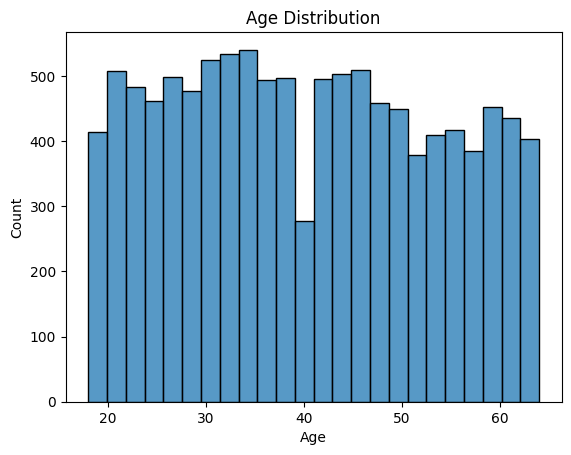

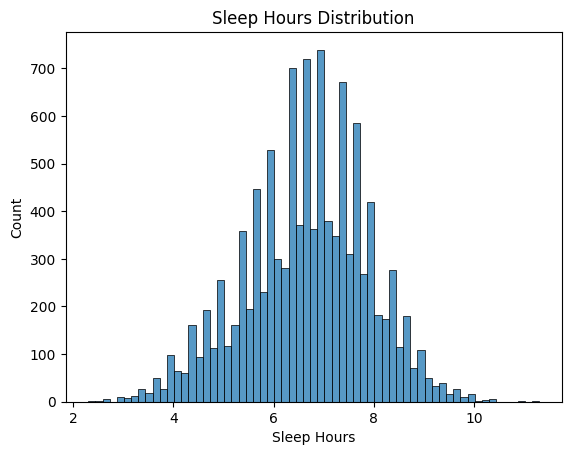

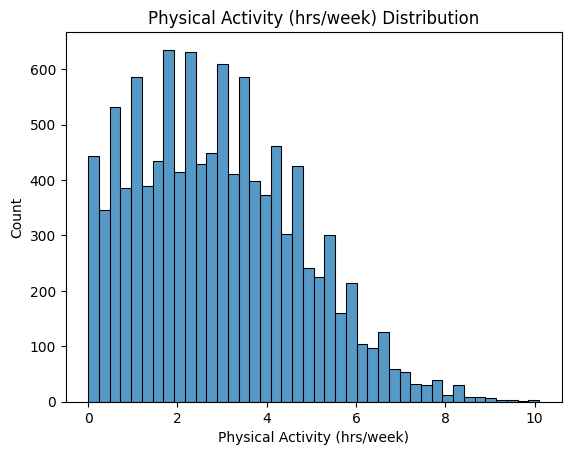

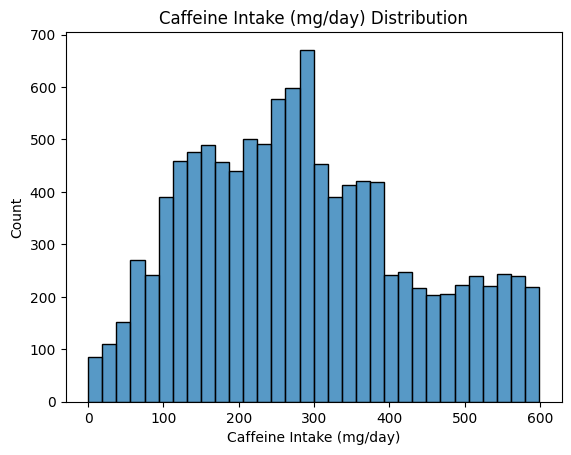

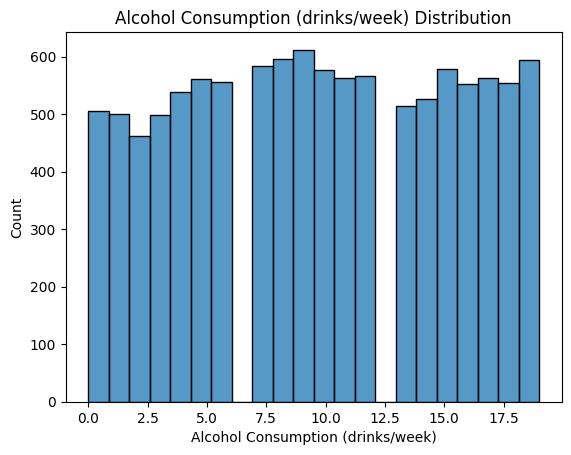

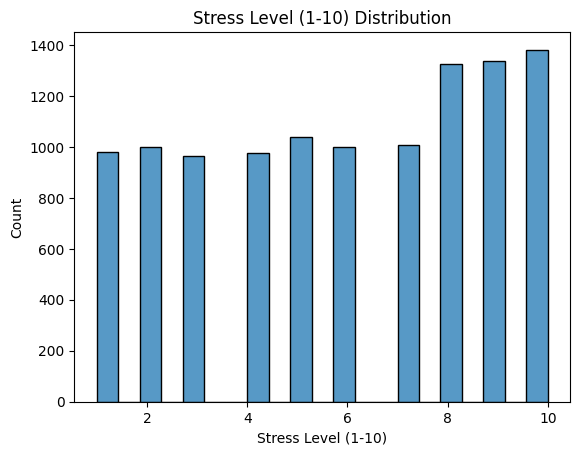

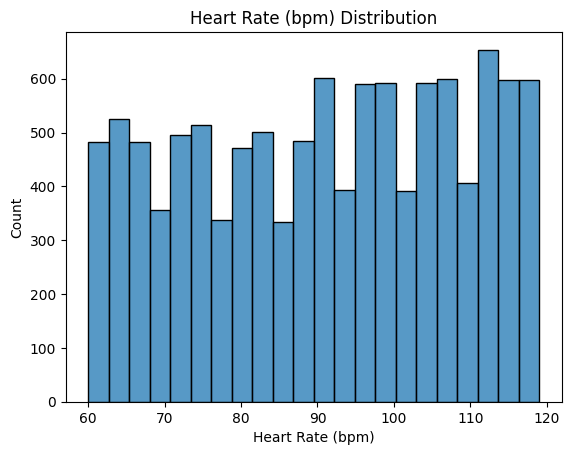

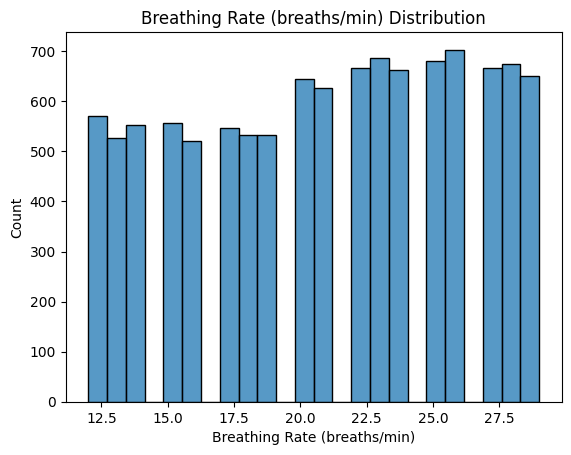

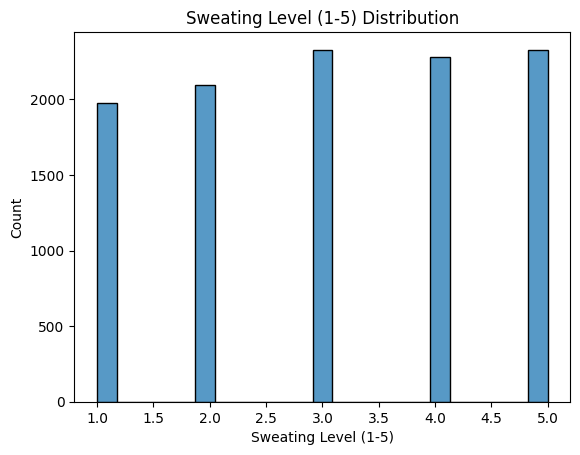

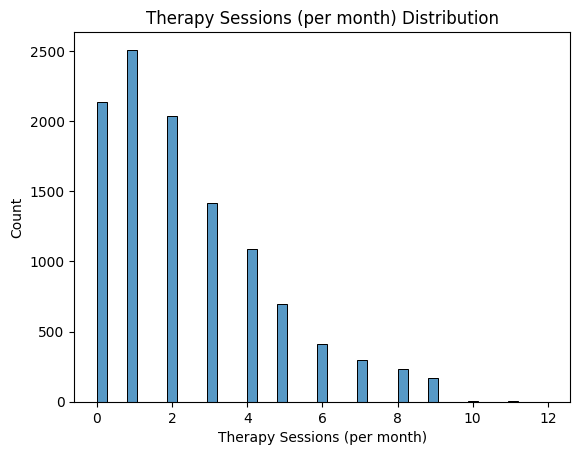

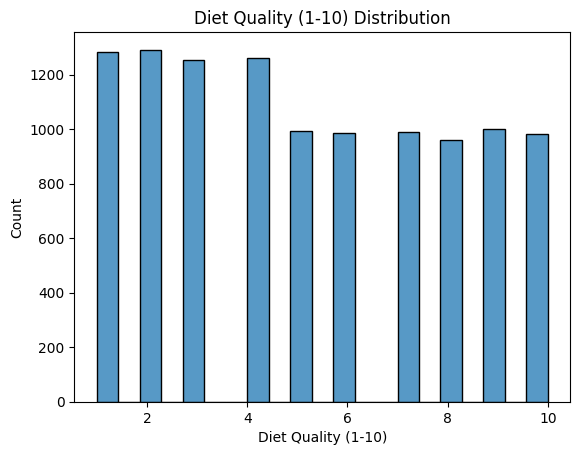

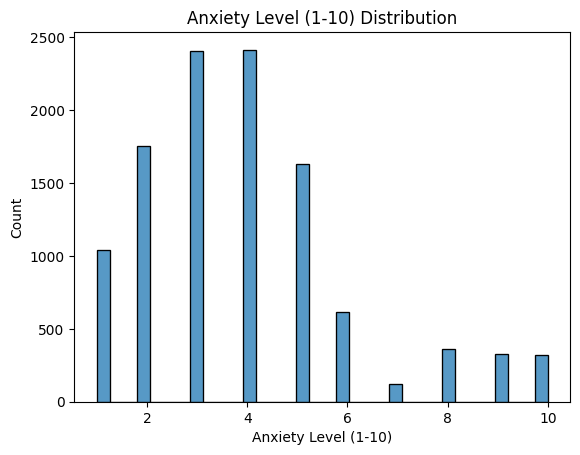

In [12]:
#
for i in data.select_dtypes(include = 'number').columns:
  sns.histplot(data, x = data[i])
  plt.title(f"{i} Distribution")
  plt.xlabel(f"{i}")
  plt.show()

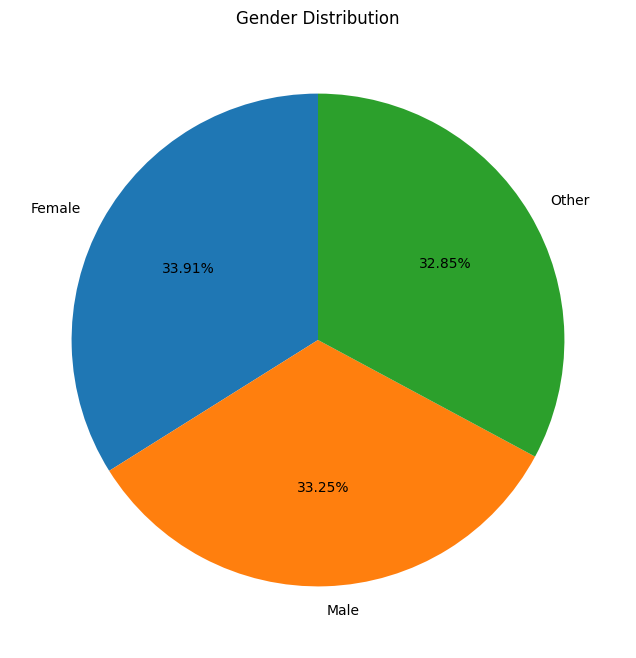

In [13]:
#Pie chart for gender
data_gender = data['Gender'].value_counts()
data_gender_label = data_gender.index
plt.figure(figsize=(8,8))
plt.pie(data_gender, labels = data_gender_label, autopct='%1.2f%%', startangle= 90)
plt.title('Gender Distribution')
plt.show()

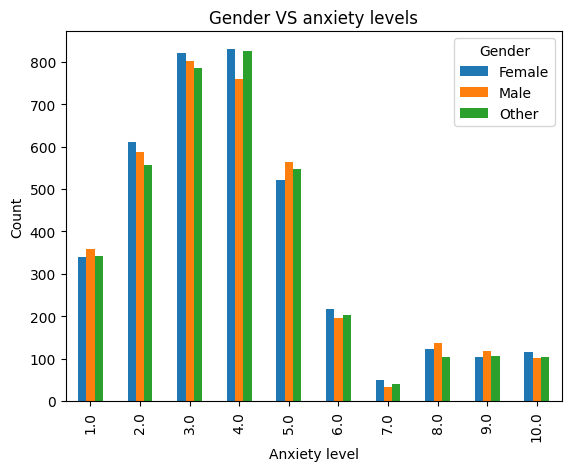

In [14]:
#Bar chart for gender against anxiety levels
data['Gender'].groupby(data['Anxiety Level (1-10)']).value_counts().unstack().plot(kind = 'bar', stacked = False)
plt.title('Gender VS anxiety levels')
plt.xlabel('Anxiety level')
plt.ylabel('Count')
plt.show()

-0.4938360295020119


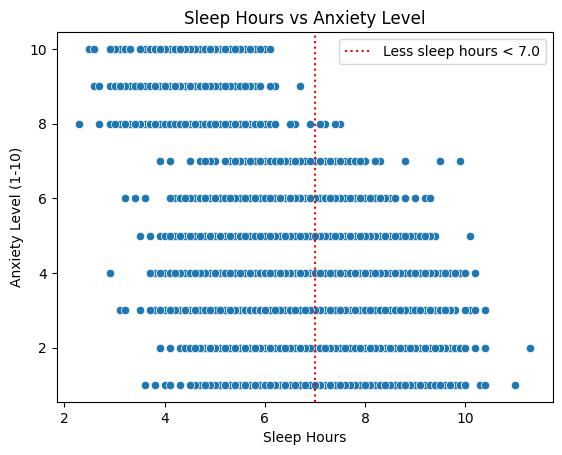

In [15]:
#Correlation between sleep hours and anxiety level
print(data['Sleep Hours'].corr(data['Anxiety Level (1-10)']))

sns.scatterplot(data = data, x = 'Sleep Hours', y = 'Anxiety Level (1-10)')
plt.axvline(x=7.0, color='red', linestyle=':', label='Less sleep hours < 7.0')
plt.legend()
plt.title('Sleep Hours vs Anxiety Level')
plt.show()

##**Insights from correlation between sleep hours and anxiety level**

Individuals who sleep for less tham 7 hours per day show 49% higher anxiety levels than those sleeping for more than 7 hours

0.35065078908300673


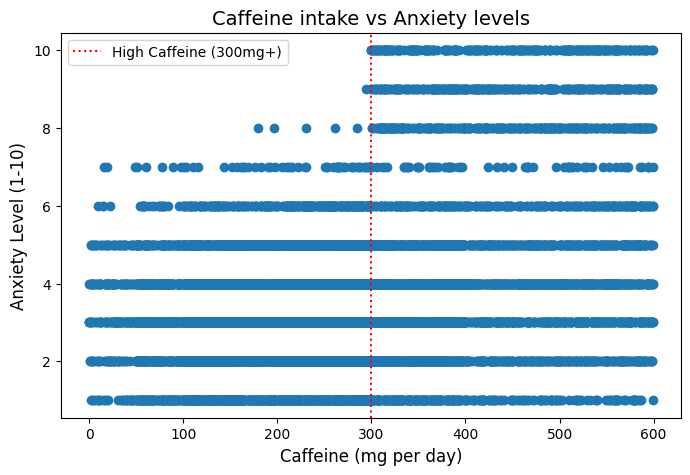

In [16]:
#Correlation between caffeine intake and anxiety levels
print(data['Caffeine Intake (mg/day)'].corr(data['Anxiety Level (1-10)']))

plt.figure(figsize=(8, 5))
plt.scatter(
    x=data['Caffeine Intake (mg/day)'],
    y=data['Anxiety Level (1-10)'],
)

plt.title("Caffeine intake vs Anxiety levels", fontsize=14)
plt.xlabel("Caffeine (mg per day)", fontsize=12)
plt.ylabel("Anxiety Level (1-10)", fontsize=12)
plt.axvline(x=300, color='red', linestyle=':',
            label='High Caffeine (300mg+)')

plt.legend()
plt.show()

##**Insights from correlation between caffeine intake and anxiety levels**

Individuals consuming 300mg or more than 300mg of caffeine per day showed 20% higher anxiety levels on average compared to those staying under this limit.

-0.2431869699434049


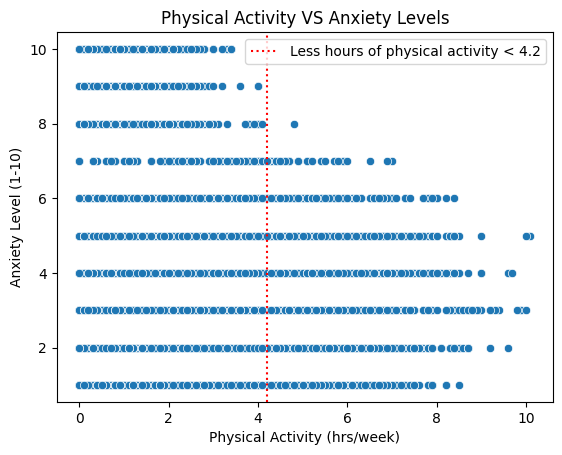

In [17]:
#Correlation between physical activity and anxiety level
print(data['Physical Activity (hrs/week)'].corr(data['Anxiety Level (1-10)']))

sns.scatterplot(data = data, x = 'Physical Activity (hrs/week)', y = 'Anxiety Level (1-10)')
plt.axvline(x=4.2, color='red', linestyle=':', label='Less hours of physical activity < 4.2')
plt.legend()
plt.title('Physical Activity VS Anxiety Levels')
plt.show()

##**Insights from correlation between physical activity and anxiety level**
Individuals who exercised for less than 4.2 hours per week show 24% higher anxiety levels than individuals who exercised for more than 4.2 hours per week.

0.10062571629711621


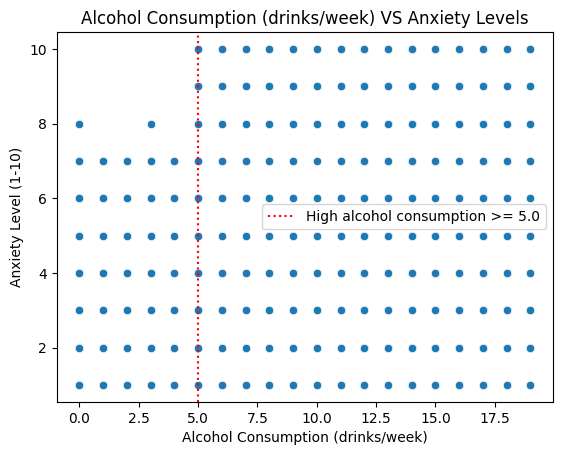

In [18]:
#Correlation between alcohol consumption and anxiety levels
print(data['Alcohol Consumption (drinks/week)'].corr(data['Anxiety Level (1-10)']))

sns.scatterplot(data = data, x = 'Alcohol Consumption (drinks/week)', y = 'Anxiety Level (1-10)')
plt.axvline(x=5.0, color='red', linestyle=':', label='High alcohol consumption >= 5.0')
plt.legend()
plt.title('Alcohol Consumption (drinks/week) VS Anxiety Levels')
plt.show()

##**Insights from comparison between alcohol consumption and anxiety levels**

Individuals who consume 5 or more drinks of alcohol show 10% higher anxiety levels than individuals who consume less than 5 drinks per week.

<ipython-input-19-421307fb6010>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  smoke = data['Smoking'].replace({'Yes': 1, 'No': 0})


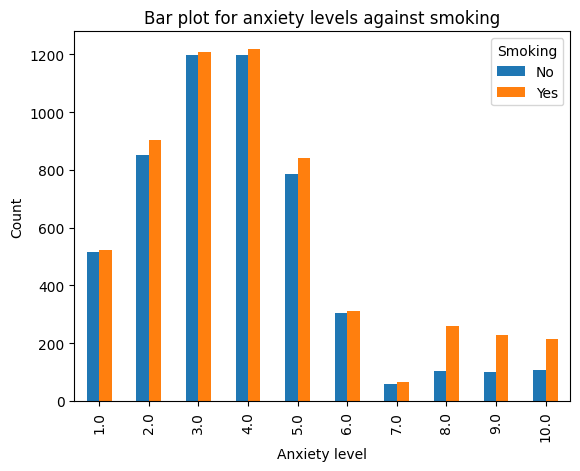

In [19]:
#Checking if smoking affects anxiety level
smoke = data['Smoking'].replace({'Yes': 1, 'No': 0})

data['Smoking'].groupby(data['Anxiety Level (1-10)']).value_counts().unstack().plot(kind = 'bar', stacked = False)
plt.title('Bar plot for anxiety levels against smoking')
plt.xlabel('Anxiety level')
plt.ylabel('Count')
plt.show()

##**Insights for comparing if smoking influences anxiety levels**

About 70% of individuals with more than 7 anxiety levels are individuals who smoke.

0.6679386584060731


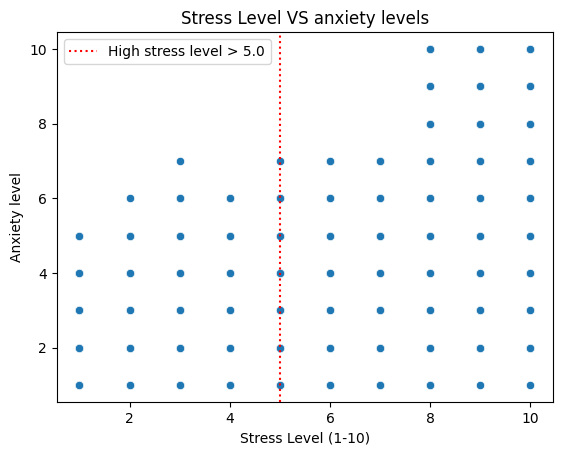

In [20]:
#Correlation between Stress level and anxiety level
print(data['Stress Level (1-10)'].corr(data['Anxiety Level (1-10)']))

sns.scatterplot(data = data, x = 'Stress Level (1-10)', y = 'Anxiety Level (1-10)')
plt.axvline(x=5.0, color='red', linestyle=':', label='High stress level > 5.0')
plt.legend()
plt.title('Stress Level VS anxiety levels')
plt.xlabel('Stress Level (1-10)')
plt.ylabel('Anxiety level')
plt.show()

##**Insights from correlation between stress level and anxiety levels**

Individuals with more than level 5 of stress levels show 66% higher anxiety levels than individuals with lower than level 5 of stress levels.

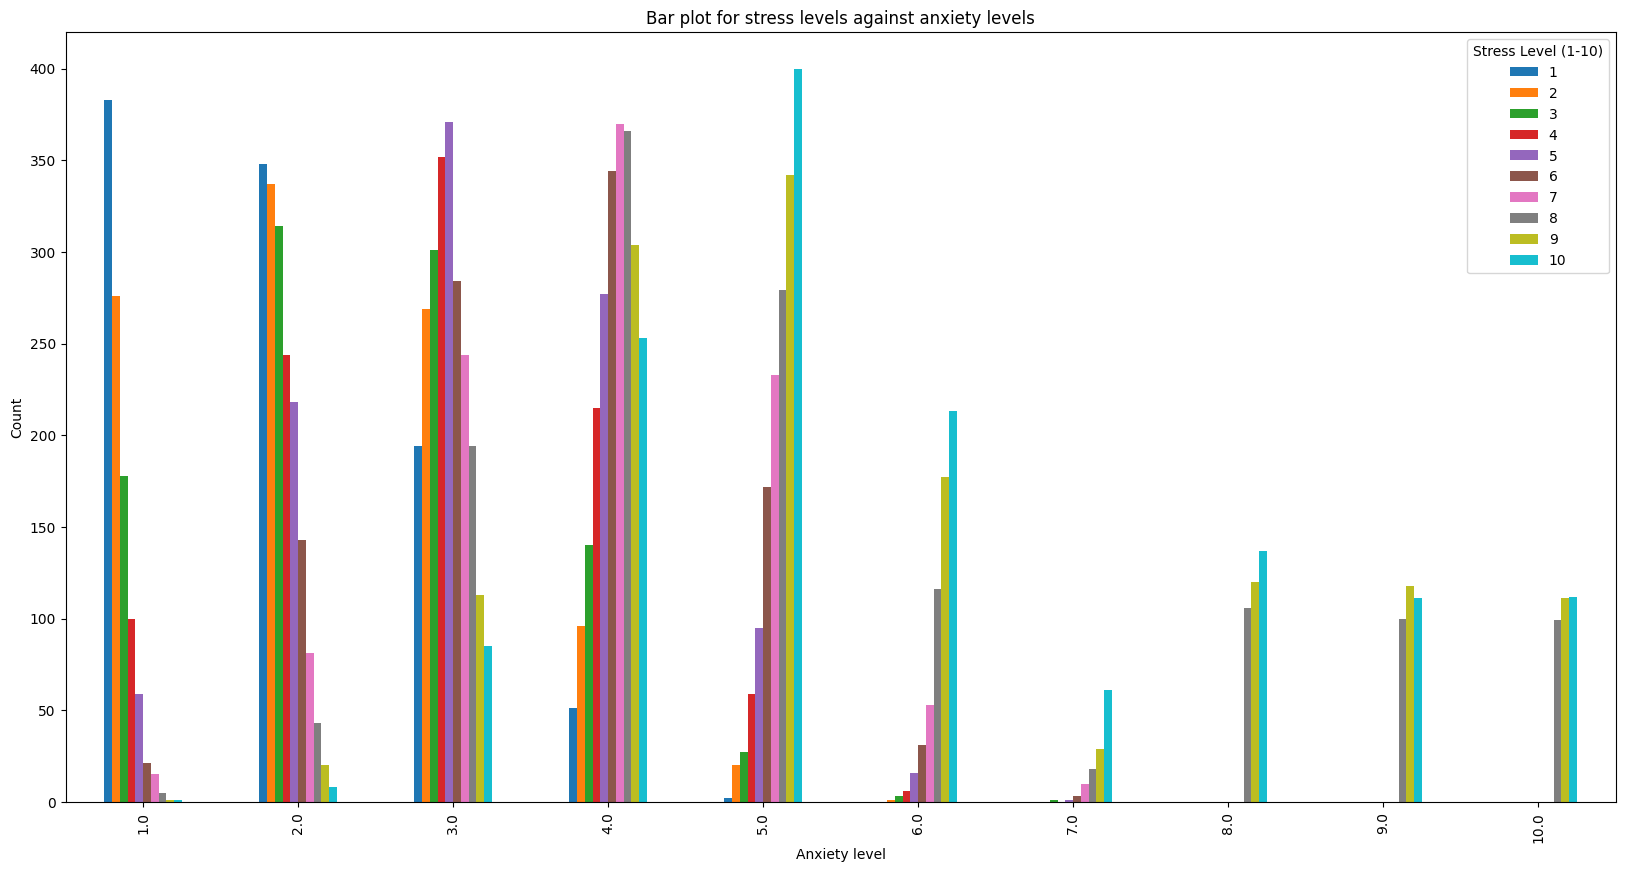

In [21]:
#Checking if stress levels have an effect on anxiety levels

data['Stress Level (1-10)'].groupby(data['Anxiety Level (1-10)']).value_counts().unstack().plot(kind = 'bar', stacked = False, figsize=(20,10))
plt.title('Bar plot for stress levels against anxiety levels')
plt.xlabel('Anxiety level')
plt.ylabel('Count')
plt.show()

##**Insights from comparisons between stress levels and anxiety levels**

* Individuals with more than level 5 of stress levels show 66% higher anxiety
levels than individuals with lower than level 5 of stress levels.

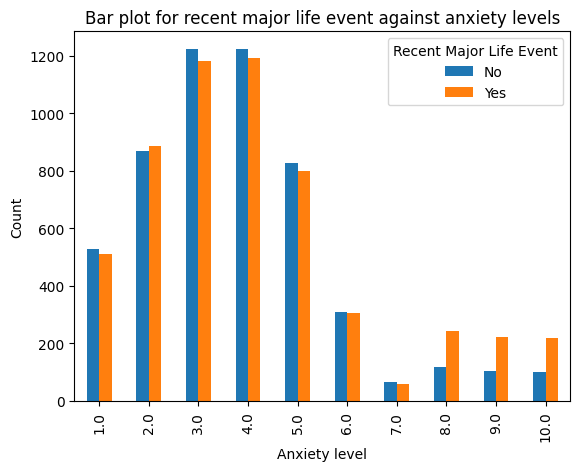

In [22]:
#Checking if an occurrence of a major life event has an effect on anxiety levels

data['Recent Major Life Event'].groupby(data['Anxiety Level (1-10)']).value_counts().unstack().plot(kind = 'bar', stacked = False)
plt.title('Bar plot for recent major life event against anxiety levels')
plt.xlabel('Anxiety level')
plt.ylabel('Count')
plt.show()

##**Insights from comparison between anxiety levels and occurrence of a major life event**

About 50% of individuals who show more than 7 anxiety level are individuals who have a recent major life event.

-0.22024523699925955


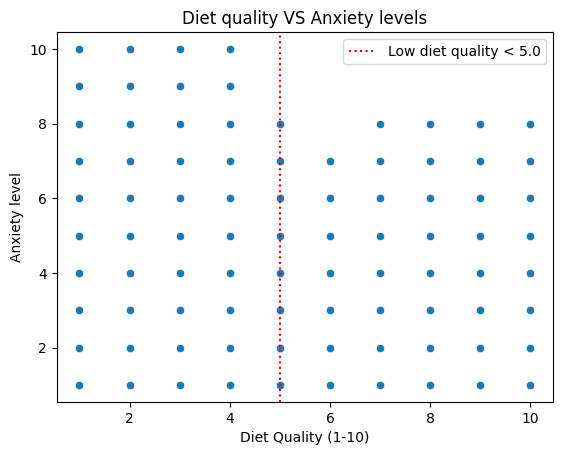

In [23]:
#Correlation between diet quality and anxiety level
print(data['Diet Quality (1-10)'].corr(data['Anxiety Level (1-10)']))

sns.scatterplot(data = data, x = 'Diet Quality (1-10)', y = 'Anxiety Level (1-10)')
plt.axvline(x=5.0, color='red', linestyle=':', label='Low diet quality < 5.0')
plt.legend()
plt.title('Diet quality VS Anxiety levels')
plt.xlabel('Diet Quality (1-10)')
plt.ylabel('Anxiety level')
plt.show()

##**Insights from correlation between diet quality and anxiety levels**

Individuals who consume foods of less than 5 in terms of diet quality show 22% higher anxiety levels than individuals who consume foods of more than 5 in terms of diet quality.

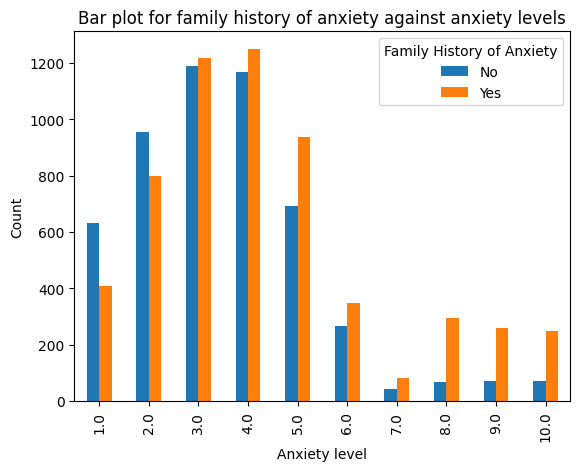

In [24]:
#Comparing family history of anxiety with anxiety levels

data['Family History of Anxiety'].groupby(data['Anxiety Level (1-10)']).value_counts().unstack().plot(kind = 'bar', stacked = False)
plt.title('Bar plot for family history of anxiety against anxiety levels')
plt.xlabel('Anxiety level')
plt.ylabel('Count')
plt.show()

##**Insights from the comparison between family history of anxiety and anxiety levels**

Over 60% of individuals with more than 5 anxiety levels are individuals who have a family history of anxiety.

In [25]:
#Exporting the cleaned dataset
data.to_csv('cleaned_anxiety_dataset.csv', index = False)

#**INSIGHTS FROM THE DATA**
*   Individuals who sleep less than 7 hours at night show 49% higher anxiety levels than those sleeping for more than 7 hours.
* Individuals consuming 300mg or more than 300mg of caffeine per day showed 20% higher anxiety levels on average compared to those consuming less than 300mg of caffeine per day.
*  Individuals who exercised for less than 4.2 hours per week show 24% higher anxiety levels than individuals who exercised for more than 4.2 hours per week.
* Individuals who consume 5 or more drinks of alcohol show 10% higher anxiety levels than individuals who consume less than 5 drinks per week.
* About 70% of individuals with more than 7 anxiety levels are individuals who smoke.
* Individuals with more than level 5 of stress levels show 66% higher anxiety levels than individuals with lower than level 5 of stress levels.
* About 50% of individuals who show more than 7 anxiety level are individuals who have had an occurrence of a recent major life event.
* Individuals who consume foods of less than 5 in terms of diet quality show 22% higher anxiety levels than individuals who consume foods of more than 5 in terms of diet quality.
* Over 60% of individuals with more than 5 anxiety levels are individuals who have a family history of anxiety.


#**RECOMMENDATIONS**



*  Individuals who sleep for less than 7 hours should be encouraged to adopt a bedtime routine that will enable them to sleep for over 7 hours and this will significantly reduce their anxiety levels by 49%.
* Individuals should track their caffeine intake per day such that they can consume less than 300mg of caffeine daily (about 2 cups of coffee) and this will reduce their anxiety levels by 20%.
* Individuals should adopt a workout routine that will enable them to exercise for more than 4.2 hours per week. The individuals can leverage on apps designed to track someone's workout routine. This will help to reduce their anxiety levels by 24%.
* Individuals should limit their consumption of alcohol to be less than 5 drinks per week and this will reduce their anxiety levels by 10%.
* Individuals who smoke should avoid smoking and alternatively, they may distract themselves with chewing gum when a craving hits. This will significantly reduce their anxiety levels.
* Individuals should consume foods of a better diet quality and strive to eat more healthy foods like fruits and vegetables than junk foods like chips and this will help reduce anxiety levels by 22%.
* Individuals with more than 5 stress level should be encouraged to speak up and be educated on the ways to manage their stress levels and this will reduce their anxiety levels by 66%.
* Individuals with a family history of anxiety should be encouraged to go for preventive mental health checkups and participate fully in anxiety preventive programs and this will significantly reduce anxiety levels by a whooping 60%.
* Individuals who have had an occurrence of a recent major life event should be counselled and encouraged to accept the situation that they are in and focus on what is ahead of them. This will reduce their anxiety levels by 50%.
